# Date Features from the datetime variable

Time series data are, by definition, time-indexed. The "time" component has information about the date and time. We can extract a number of features from the time component of the index.

In this notebook, we will see how we can easily derive many date-related features.


## Features from the date part:

Below are some of the features that we can extract from the date part of the datetime variable off-the-shelf using [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components):


- pandas.Series.dt.year
- pandas.Series.dt.quarter
- pandas.Series.dt.month
- pandas.Series.dt.isocalendar().week
- pandas.Series.dt.day
- pandas.Series.dt.day_of_week
- pandas.Series.dt.weekday
- pandas.Series.dt.dayofyear
- pandas.Series.dt.day_of_year

- pandas.Series.dt.is_month_start
- pandas.Series.dt.is_month_end
- pandas.Series.dt.is_quarter_start
- pandas.Series.dt.is_quarter_end
- pandas.Series.dt.is_year_start
- pandas.Series.dt.is_year_end
- pandas.Series.dt.is_leap_year
- pandas.Series.dt.days_in_month

We can use the features obtained with pandas to create even more features, such as:

- Semester
- Is Weekend?

And if we know the dates representing bank holidays in the countries of interest, we could create functions to add those as well.



## The dataset

We will use the Online Retail II Data Set available in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00502/).

Download the xlsx file from the link above and save it in the **Datasets** folder within this repo.

**Citation**:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## In this demo

We will extract different features from the datetime variable: **InvoiceDate**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
# File path:
file = "../Datasets/online_retail_II.xlsx"

# The data is provided as two sheets in a single Excel file.
# Each sheet contains a different time period.
# Load both and join them into a single dataframe
# as shown below:

df_1 = pd.read_excel(file, sheet_name="Year 2009-2010")
df_2 = pd.read_excel(file, sheet_name="Year 2010-2011")

data = pd.concat([df_1, df_2])

print(data.shape)

data.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In this dataset, we have the datetime variable in a column called InvoiceDate. We could also have it in the dataframe index. The procedure for extracting the date and time features is identical. That is, we would use the methods from pandas dt as shown below.

The dataset contains sales information for different customers in different countries. Customers may have made one or multiple purchases from the business that provided the data.

## Variable format

In [3]:
# Let's determine the type of data in the datetime variable.

data["InvoiceDate"].dtypes

dtype('<M8[ns]')

In this dataset, the variable is already parsed as datetime data.

In some datasets, the datetime variable may be cast as an object, i.e., strings. In these cases, before carrying on with the rest of the notebook, we should re-cast it from object into datetime, as we do in the following cell: 

In [4]:
# This is how we parse date strings into datetime format:

data["date"] = pd.to_datetime(data["InvoiceDate"])

data[["date", "InvoiceDate"]].head()

,date,InvoiceDate
0,2009-12-01 07:45:00,2009-12-01 07:45:00
1,2009-12-01 07:45:00,2009-12-01 07:45:00
2,2009-12-01 07:45:00,2009-12-01 07:45:00
3,2009-12-01 07:45:00,2009-12-01 07:45:00
4,2009-12-01 07:45:00,2009-12-01 07:45:00


In [5]:
# Let's inspect the new data type.

data[["date", "InvoiceDate"]].dtypes

date           datetime64[ns]
InvoiceDate    datetime64[ns]
dtype: object

## Date and time parts

The date and time parts of the datetime variable are not useful for predictions, but they may be handy for data analysis and grouping. 

Here we show how we can extract the date and time parts of the datetime variable:

In [6]:
# Extract the date part.

data["date_part"] = data["date"].dt.date

data["date_part"].head()

0    2009-12-01
1    2009-12-01
2    2009-12-01
3    2009-12-01
4    2009-12-01
Name: date_part, dtype: object

In [7]:
# Extract the time part.
# (we don't need it for this demo,
# so I will not add it to the dataframe).

time_ = data["date"].dt.time

time_.head()

0    07:45:00
1    07:45:00
2    07:45:00
3    07:45:00
4    07:45:00
Name: date, dtype: object

## Features derived from date

In this notebook, we will focus on extracting features from the **date part** of the datetime variable. We can derive these features from the original datetime variable or the date part of the datetime variable. 

###  Year

In [8]:
# Extract year.

data["invoice_year"] = data["date"].dt.year

data[["invoice_year", "date"]].head()

,invoice_year,date
0,2009,2009-12-01 07:45:00
1,2009,2009-12-01 07:45:00
2,2009,2009-12-01 07:45:00
3,2009,2009-12-01 07:45:00
4,2009,2009-12-01 07:45:00


In [9]:
# Show unique values in the new variable.

data["invoice_year"].unique()

array([2009, 2010, 2011], dtype=int64)

### Year start and end

Let's create a feature that flags if the date corresponds to the first or last day of the year. Pandas will return a True/False feature.

In [10]:
# Extract year start and year end.

data["invoice_year_start"] = data["date"].dt.is_year_start
data["invoice_year_end"] = data["date"].dt.is_year_end

data[["invoice_year_start", "invoice_year_end", "date"]].head()

,invoice_year_start,invoice_year_end,date
0,False,False,2009-12-01 07:45:00
1,False,False,2009-12-01 07:45:00
2,False,False,2009-12-01 07:45:00
3,False,False,2009-12-01 07:45:00
4,False,False,2009-12-01 07:45:00


In [11]:
data["invoice_year_start"].unique()

array([False])

In [12]:
data["invoice_year_end"].unique()

array([False])

No sales over the first and last day of the year. Makes sense, those are bank holidays in many countries, including the UK, were most of the sales were done in this dataset.

### Leap year

Let's create a feature that flags if a year was a leap year.

In [13]:
# Extract leap year.

data["invoice_year_leap"] = data["date"].dt.is_leap_year

data[["invoice_year", "invoice_year_leap"]].head()

,invoice_year,invoice_year_leap
0,2009,False
1,2009,False
2,2009,False
3,2009,False
4,2009,False


In [14]:
data["invoice_year_leap"].unique()

array([False])

None of 2009, 2010, 2011 were leap years.

### Extract quarter

In [15]:
# Extract quarter from date variable - takes values 1 to 4.

data["invoice_quarter"] = data["date"].dt.quarter

data[["date", "invoice_quarter"]].head()

,date,invoice_quarter
0,2009-12-01 07:45:00,4
1,2009-12-01 07:45:00,4
2,2009-12-01 07:45:00,4
3,2009-12-01 07:45:00,4
4,2009-12-01 07:45:00,4


In [16]:
data["invoice_quarter"].unique()

array([4, 1, 2, 3], dtype=int64)

### Quarter start and end

In [17]:
# Extract quarter start and end.

data["invoice_quarter_start"] = data["date"].dt.is_quarter_start
data["invoice_quarter_end"] = data["date"].dt.is_quarter_end

data[["invoice_quarter_start", "invoice_quarter_end", "date"]].head()

,invoice_quarter_start,invoice_quarter_end,date
0,False,False,2009-12-01 07:45:00
1,False,False,2009-12-01 07:45:00
2,False,False,2009-12-01 07:45:00
3,False,False,2009-12-01 07:45:00
4,False,False,2009-12-01 07:45:00


In [18]:
data["invoice_quarter_start"].unique()

array([False,  True])

In [19]:
# With this command we can see that the variable we created coincides
# with the quarter start - just a sanity check.

data[data["invoice_quarter_start"] == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,date_part,invoice_year,invoice_year_start,invoice_year_end,invoice_year_leap,invoice_quarter,invoice_quarter_start,invoice_quarter_end
147682,503430,21523,DOOR MAT FANCY FONT HOME SWEET HOME,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147683,503430,21524,DOOR MAT SPOTTY HOME SWEET HOME,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147684,503430,48116,DOOR MAT MULTICOLOUR STRIPE,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147685,503430,48129,DOOR MAT TOPIARY,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147686,503430,48187,DOOR MAT NEW ENGLAND,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False


### Extract semester

With the quarter information, we can obtain the semester.

In [20]:
# Extract semester.

data["invoice_semester"] = np.where(data["invoice_quarter"].isin([1, 2]), 1, 2)

data[["invoice_semester", "invoice_quarter"]].head()

,invoice_semester,invoice_quarter
0,2,4
1,2,4
2,2,4
3,2,4
4,2,4


In [21]:
data["invoice_semester"].unique()

array([2, 1])

### Extract month

In [22]:
# Extract month - 1 to 12.

data["invoice_month"] = data["date"].dt.month

data[["date", "invoice_month"]].head()

,date,invoice_month
0,2009-12-01 07:45:00,12
1,2009-12-01 07:45:00,12
2,2009-12-01 07:45:00,12
3,2009-12-01 07:45:00,12
4,2009-12-01 07:45:00,12


In [23]:
data["invoice_month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

### Days in month

Useful for adjusting the time series based on days. 

If we are forecasting sales per month, we may need this adjustment, as longer months may incur in more sales, just because there are more days.

In [24]:
# Number of days in a month.

data["days_in_month"] = data["date"].dt.days_in_month

data[["days_in_month", "invoice_month"]].head()

,days_in_month,invoice_month
0,31,12
1,31,12
2,31,12
3,31,12
4,31,12


In [25]:
data["days_in_month"].unique()

array([31, 28, 30], dtype=int64)

### Month start and end

In [26]:
# Extract month start and end.

data["invoice_month_start"] = data["date"].dt.is_month_start
data["invoice_month_end"] = data["date"].dt.is_month_end

data["invoice_month_start"].unique()

array([ True, False])

### Extract week of the year

In [27]:
# Extract week of the year - varies from 1 to 52.

data["invoice_week"] = data["date"].dt.isocalendar().week

data[["date", "invoice_week"]].head()

,date,invoice_week
0,2009-12-01 07:45:00,49
1,2009-12-01 07:45:00,49
2,2009-12-01 07:45:00,49
3,2009-12-01 07:45:00,49
4,2009-12-01 07:45:00,49


In [28]:
data["invoice_week"].unique()

<IntegerArray>
[49, 50, 51, 52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Length: 52, dtype: UInt32

### Extract days in various formats

In [29]:
# Day of the month - numeric from 1-31.

data["invoice_day"] = data["date"].dt.day

data[["date", "invoice_day"]].head()

,date,invoice_day
0,2009-12-01 07:45:00,1
1,2009-12-01 07:45:00,1
2,2009-12-01 07:45:00,1
3,2009-12-01 07:45:00,1
4,2009-12-01 07:45:00,1


In [30]:
data["invoice_day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       20, 21, 22, 23, 12, 19, 24, 25, 26, 27, 28, 29, 31, 30],
      dtype=int64)

In [31]:
# Day of the week - from 0 to 6.

# It is assumed the week starts on Monday,
# denoted by 0, and ends on Sunday, denoted by 6.

data["invoice_dayofweek"] = data["date"].dt.dayofweek

data[["date", "invoice_dayofweek"]].head()

,date,invoice_dayofweek
0,2009-12-01 07:45:00,1
1,2009-12-01 07:45:00,1
2,2009-12-01 07:45:00,1
3,2009-12-01 07:45:00,1
4,2009-12-01 07:45:00,1


In [32]:
data["invoice_dayofweek"].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [33]:
# Day of the week - string (not useful for predictions,
# but since we are here...).

data["invoice_day_name"] = data["date"].dt.day_name()

data[["date", "invoice_day_name"]].head()

,date,invoice_day_name
0,2009-12-01 07:45:00,Tuesday
1,2009-12-01 07:45:00,Tuesday
2,2009-12-01 07:45:00,Tuesday
3,2009-12-01 07:45:00,Tuesday
4,2009-12-01 07:45:00,Tuesday


In [34]:
data["invoice_day_name"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [35]:
# Was the invoice issued on a weekend?

data["is_weekend"] = data["date"].dt.dayofweek > 4

data[["date", "invoice_day_name", "is_weekend"]].head()

,date,invoice_day_name,is_weekend
0,2009-12-01 07:45:00,Tuesday,False
1,2009-12-01 07:45:00,Tuesday,False
2,2009-12-01 07:45:00,Tuesday,False
3,2009-12-01 07:45:00,Tuesday,False
4,2009-12-01 07:45:00,Tuesday,False


In [36]:
data["is_weekend"].unique()

array([False,  True])

## Day of the year

In [37]:
# Day of the year - 1 to 365.

# I can't imagine when this feature would be
# useful. Maybe, if we had data for several years,
# to identify some repetitive pattern.

data["invoice_day_year"] = data["date"].dt.dayofyear

data[["date", "invoice_day_year"]].head()

,date,invoice_day_year
0,2009-12-01 07:45:00,335
1,2009-12-01 07:45:00,335
2,2009-12-01 07:45:00,335
3,2009-12-01 07:45:00,335
4,2009-12-01 07:45:00,335


In [38]:
data["invoice_day_year"].agg(["min", "max"])

min      4
max    357
Name: invoice_day_year, dtype: int64

## Data Analysis

We can use these features as input features to a regression model. And we can use many of these features to try and understand more about our time series data as well.

In [39]:
# First, I will drop data from unknown customers.
# In other words, when the customer's ID is
# missing.

data.dropna(subset=["Customer ID"], inplace=True)

In [40]:
# Remove orders that were cancelled.

cancelled = data["Invoice"].apply(lambda x: str(x)[0] == "C")
data = data[~cancelled]

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,date_part,...,invoice_month,days_in_month,invoice_month_start,invoice_month_end,invoice_week,invoice_day,invoice_dayofweek,invoice_day_name,is_weekend,invoice_day_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,...,12,31,True,False,49,1,1,Tuesday,False,335
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,...,12,31,True,False,49,1,1,Tuesday,False,335
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,...,12,31,True,False,49,1,1,Tuesday,False,335
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,...,12,31,True,False,49,1,1,Tuesday,False,335
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,...,12,31,True,False,49,1,1,Tuesday,False,335


Text(0.5, 1.0, 'Items Sold in the UK')

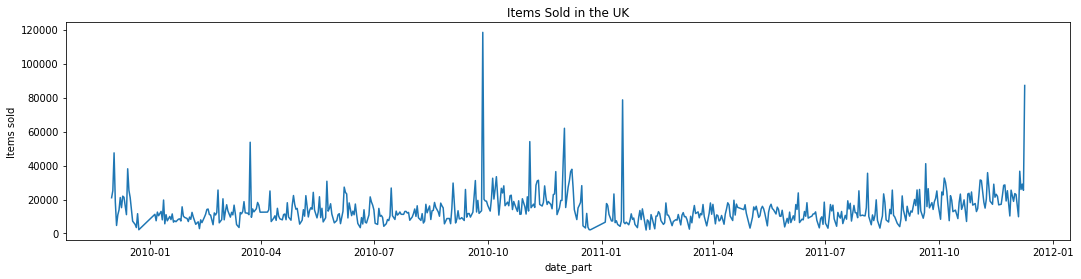

In [41]:
# Plot the time series sales for the United Kingdom.

data.groupby(["date_part", "Country"])["Quantity"].sum().unstack()[
    "United Kingdom"
].plot(figsize=(18, 4))
plt.ylabel("Items sold")
plt.title("Items Sold in the UK")

In [42]:
# Narrow down the data to the UK.

uk = data[data["Country"] == "United Kingdom"]

# Do we sell more items on weekends?

# With sum we find the total number of items sold.
# With count we find the total number of sales made.

uk.groupby("is_weekend")["Quantity"].agg(["count", "sum"])

,count,sum
is_weekend,,
False,594972,7786020
True,130324,932803


In [43]:
# Let's find out how many items we sell per individual sale:

temp = uk.groupby("is_weekend")["Quantity"].agg(["count", "sum"])
temp["mean_no_items_per_sale"] = temp["sum"] / temp["count"]

temp

,count,sum,mean_no_items_per_sale
is_weekend,,,
False,594972,7786020,13.086364
True,130324,932803,7.157569


It looks like we sell more items during the week. For every individual sale we make during the week, we sell 13 items, whereas on weekends we sell 7 items.

Maybe it is because on Sunday the retail company is closed. Then, we see half the sales of a normal day. 

**Would you like to go ahead and have a look at that? As homework :)**

Text(0.5, 1.0, 'Items Sold in the UK')

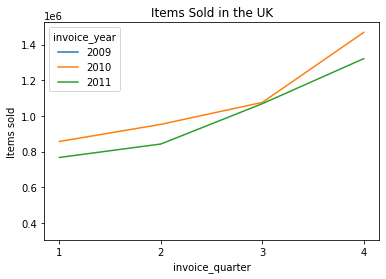

In [44]:
# How many items do we sell throughout the year?

uk.groupby(["invoice_quarter", "invoice_year"])["Quantity"].sum().unstack().plot(
    xticks=[1, 2, 3, 4]
)
plt.ylabel("Items sold")
plt.title("Items Sold in the UK")

Text(0.5, 1.0, 'Items Sold in the UK')

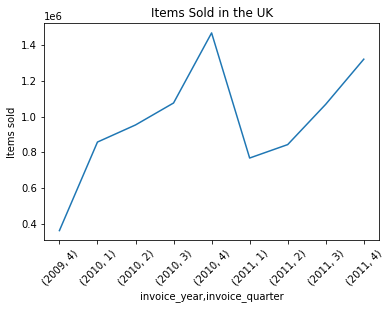

In [45]:
# Let's try and see if there is seasonality.

uk.groupby(["invoice_year", "invoice_quarter"])["Quantity"].sum().plot(rot=45)
plt.ylabel("Items sold")
plt.title("Items Sold in the UK")

It is hard to say for sure. We would need more data, but there seems to be quarterly seasonality.

Text(0.5, 1.0, 'Items Sold in the UK')

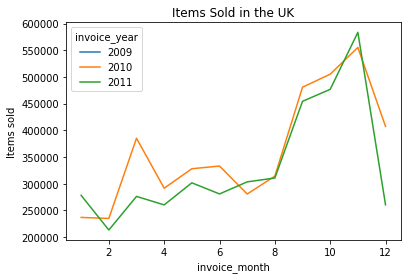

In [46]:
# If we go down to months instead of quarters...

uk.groupby(["invoice_month", "invoice_year"])["Quantity"].sum().unstack().plot()
plt.ylabel("Items sold")
plt.title("Items Sold in the UK")

There seems to be seasonality, with peak sales occurring from September to December.

Text(0.5, 1.0, 'Items Sold in the UK')

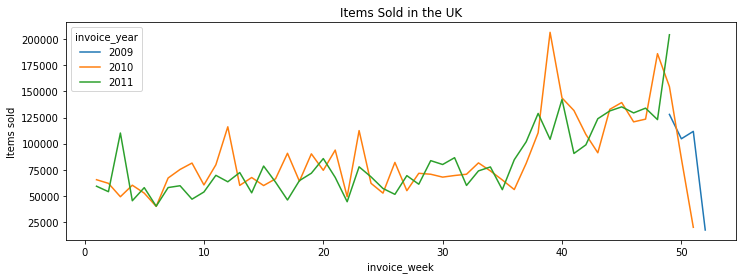

In [47]:
# And since we are here, let's look at weekly data.

uk.groupby(["invoice_week", "invoice_year"])["Quantity"].sum().unstack().plot(
    figsize=(12, 4)
)
plt.ylabel("Items sold")
plt.title("Items Sold in the UK")

## Some thoughts

In this notebook, we presented a lot of features that can be extracted from the date part of a datetime variable. Some of these features will be suitable for analysis, and some could be suitable for forecasting.

**Which features should we create?**

It will depend on what we are trying to forecast. If we are trying to make weekly forecasts, then week features might be the most useful.

Data exploration together with defining the forecasting horizon framework will help us decide which features are the most useful.

If we want to automate feature engineering, we may as well extract as many features as possible, and then let algorithms decide which ones are useful.

In fact, there are some libraries that output date features automatically, which we will explore in coming notebooks.

That is all for this one!